# Click-Through Rate Prediction

In [1]:
import numpy as np
import random
n = 40428967  #total number of records in the clickstream data 
sample_size = 1000000
skip_values = sorted(random.sample(range(1,n), n-sample_size)) 

types_train = {
    'id': np.dtype(int),
    'click': np.dtype(int),
    'hour': np.dtype(int),
    'C1': np.dtype(int),
    'banner_pos': np.dtype(int),
    'site_id': np.dtype(str),
    'site_domain': np.dtype(str), 
    'site_category': np.dtype(str),
    'app_id': np.dtype(str),
    'app_domain': np.dtype(str),
    'app_category': np.dtype(str),
    'device_id': np.dtype(str),
    'device_ip': np.dtype(str),
    'device_model': np.dtype(str),
    'device_type': np.dtype(int),
    'device_conn_type': np.dtype(int),
    'C14': np.dtype(int),
    'C15': np.dtype(int),
    'C16': np.dtype(int),
    'C17': np.dtype(int),
    'C18': np.dtype(int),
    'C19': np.dtype(int),
    'C20': np.dtype(int),
    'C21':np.dtype(int)
}

types_test = {
    'id': np.dtype(int),
    'hour': np.dtype(int),
    'C1': np.dtype(int),
    'banner_pos': np.dtype(int),
    'site_id': np.dtype(str),
    'site_domain': np.dtype(str), 
    'site_category': np.dtype(str),
    'app_id': np.dtype(str),
    'app_domain': np.dtype(str),
    'app_category': np.dtype(str),
    'device_id': np.dtype(str),
    'device_ip': np.dtype(str),
    'device_model': np.dtype(str),
    'device_type': np.dtype(int),
    'device_conn_type': np.dtype(int),
    'C14': np.dtype(int),
    'C15': np.dtype(int),
    'C16': np.dtype(int),
    'C17': np.dtype(int),
    'C18': np.dtype(int),
    'C19': np.dtype(int),
    'C20': np.dtype(int),
    'C21':np.dtype(int)
}

In [2]:
import pandas as pd
import gzip

parse_date = lambda val : pd.datetime.strptime(val, '%y%m%d%H')

with gzip.open('../input/avazu-ctr-prediction/train.gz') as f:
    train = pd.read_csv(f, parse_dates = ['hour'], date_parser = parse_date, dtype=types_train, skiprows = skip_values)

train.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  after removing the cwd from sys.path.


,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,...,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
0,10000371904215119486,0,2014-10-21,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15704,320,50,1722,0,35,100084,79
1,10005334911727438633,0,2014-10-21,1010,1,85f751fd,c4e18dd6,50e219e0,ffc6ffd0,7801e8d9,...,4,0,21665,320,50,2493,3,35,-1,117
2,10018283997673108970,0,2014-10-21,1002,0,75f43c5a,c4e18dd6,50e219e0,ecad2386,7801e8d9,...,0,0,21665,320,50,2493,3,35,-1,117
3,10033513319859181431,0,2014-10-21,1010,1,85f751fd,c4e18dd6,50e219e0,c7f29df3,7801e8d9,...,5,0,21665,320,50,2493,3,35,100233,117
4,10033757931529432991,1,2014-10-21,1005,0,85f751fd,c4e18dd6,50e219e0,54c5d545,2347f47a,...,1,0,6558,320,50,571,2,39,-1,32


In [3]:
parse_date = lambda val : pd.datetime.strptime(val, '%y%m%d%H')

with gzip.open('../input/avazu-ctr-prediction/test.gz') as f:
    test = pd.read_csv(f, parse_dates = ['hour'], date_parser = parse_date, dtype=types_test, skiprows = skip_values)

test.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  """Entry point for launching an IPython kernel.


,id,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,...,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
0,10000554139829213984,2014-10-31,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,...,1,0,22676,320,50,2616,0,35,100083,51
1,10004882149038870218,2014-10-31,1005,0,85f751fd,c4e18dd6,50e219e0,66f5e02e,6f7ca2ba,0f2161f8,...,1,0,23684,300,50,2712,2,35,-1,23
2,10022367855008997866,2014-10-31,1012,0,7eb59634,c4e18dd6,f028772b,ecad2386,7801e8d9,07d7df22,...,1,2,20345,300,250,2331,2,39,100194,23
3,10039182264794418888,2014-10-31,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,...,1,0,22676,320,50,2616,0,35,-1,51
4,1003960847285576794,2014-10-31,1005,1,e151e245,7e091613,f028772b,ecad2386,7801e8d9,07d7df22,...,1,0,22815,320,50,2647,2,39,100148,23


In [4]:
test.shape

(113110, 23)

In [5]:
test_copy=test.copy()

In [6]:
with gzip.open('../input/avazu-ctr-prediction/sampleSubmission.gz') as f:
    sub = pd.read_csv(f, skiprows = skip_values)

sub.head()

,id,click
0,10000554139829213984,0.5
1,10004882149038870218,0.5
2,10022367855008997866,0.5
3,10039182264794418888,0.5
4,1003960847285576794,0.5


In [7]:
sub.shape

(113110, 2)

In [8]:
train.shape

(1000000, 24)

In [9]:
train.dtypes

id                          uint64
click                        int64
hour                datetime64[ns]
C1                           int64
banner_pos                   int64
site_id                     object
site_domain                 object
site_category               object
app_id                      object
app_domain                  object
app_category                object
device_id                   object
device_ip                   object
device_model                object
device_type                  int64
device_conn_type             int64
C14                          int64
C15                          int64
C16                          int64
C17                          int64
C18                          int64
C19                          int64
C20                          int64
C21                          int64
dtype: object

Target feature -> click

site features -> site_id, site_domain, site_category

app feature -> app_id, app_domain, app_category

device feature -> device_id, device_ip, device_model, device_type, device_conn_type

anonymized categorical features -> C14-C21

In [10]:
train['click'].value_counts()

0    830705
1    169295
Name: click, dtype: int64

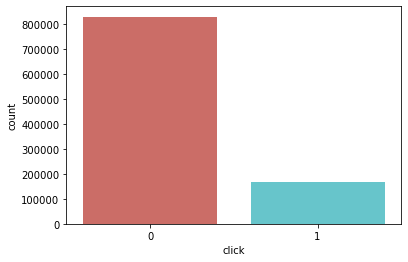

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='click',data=train, palette='hls')
plt.show();

In [12]:
train['click'].value_counts()/len(train)

0    0.830705
1    0.169295
Name: click, dtype: float64

Click through rate is approx. 17%, and approx. 83% is not clicked. 

In [13]:
train.hour.describe()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


count                 1000000
unique                    240
top       2014-10-22 09:00:00
freq                    11135
first     2014-10-21 00:00:00
last      2014-10-30 23:00:00
Name: hour, dtype: object

The data covers 10 days of click streams data from 2014-10-21 to 2014-10-30, that is 240 hours.

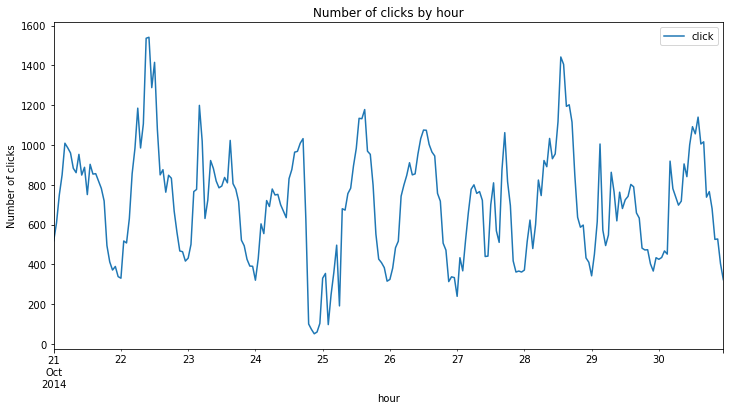

In [14]:
train.groupby('hour').agg({'click':'sum'}).plot(figsize=(12,6))
plt.ylabel('Number of clicks')
plt.title('Number of clicks by hour');

The hourly clicks pattern looks pretty similar every day. However, there were a couple of peak hours, one is sometime in the mid of the day on Oct 22, and another is sometime in the mid of the day on Oct 28. And one off-peak hour is close to mid-night on Oct 24.

###  Feature engineering for date time features

#### Hour

Extract hour from date time feature.

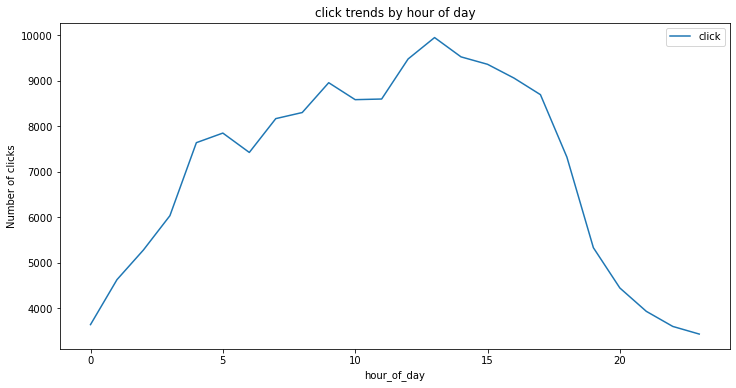

In [15]:
train['hour_of_day'] = train.hour.apply(lambda x: x.hour)
train.groupby('hour_of_day').agg({'click':'sum'}).plot(figsize=(12,6))
plt.ylabel('Number of clicks')
plt.title('click trends by hour of day');

In general, the highest number of clicks is at hour 13 and 14 (1pm and 2pm), and the least number of clicks is at hour 0 (mid-night). It seems a useful feature for roughly estimation.

In [16]:
test['hour_of_day'] = test.hour.apply(lambda x: x.hour)

In [17]:
train.head(3)

,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,...,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21,hour_of_day
0,10000371904215119486,0,2014-10-21,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,0,15704,320,50,1722,0,35,100084,79,0
1,10005334911727438633,0,2014-10-21,1010,1,85f751fd,c4e18dd6,50e219e0,ffc6ffd0,7801e8d9,...,0,21665,320,50,2493,3,35,-1,117,0
2,10018283997673108970,0,2014-10-21,1002,0,75f43c5a,c4e18dd6,50e219e0,ecad2386,7801e8d9,...,0,21665,320,50,2493,3,35,-1,117,0


Let's take impressions into consideration.

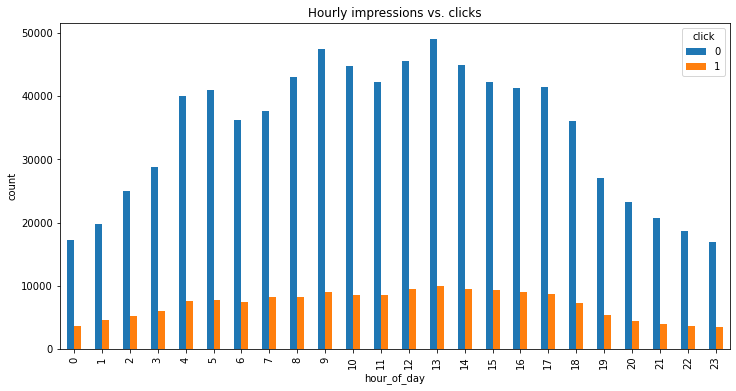

In [18]:
train.groupby(['hour_of_day', 'click']).size().unstack().plot(kind='bar', title="Hour of Day", figsize=(12,6))
plt.ylabel('count')
plt.title('Hourly impressions vs. clicks');

There is nothing shocking here.

In [19]:
train.head(3)

,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,...,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21,hour_of_day
0,10000371904215119486,0,2014-10-21,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,0,15704,320,50,1722,0,35,100084,79,0
1,10005334911727438633,0,2014-10-21,1010,1,85f751fd,c4e18dd6,50e219e0,ffc6ffd0,7801e8d9,...,0,21665,320,50,2493,3,35,-1,117,0
2,10018283997673108970,0,2014-10-21,1002,0,75f43c5a,c4e18dd6,50e219e0,ecad2386,7801e8d9,...,0,21665,320,50,2493,3,35,-1,117,0


Now that we have click and impression. We can calculate Click-through rate (CTR). CTR is the ratio of ad clicks to impressions. It measures the rate of clicks on each ad.

#### Hourly CTR

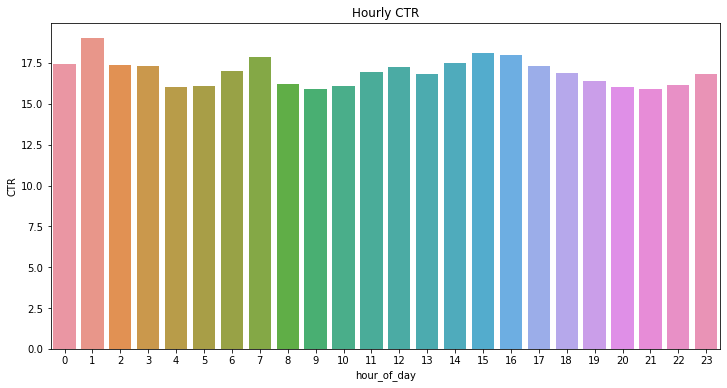

In [20]:
import seaborn as sns

df_click = train[train['click'] == 1]
df_hour = train[['hour_of_day','click']].groupby(['hour_of_day']).count().reset_index()
df_hour = df_hour.rename(columns={'click': 'impressions'})
df_hour['clicks'] = df_click[['hour_of_day','click']].groupby(['hour_of_day']).count().reset_index()['click']
df_hour['CTR'] = df_hour['clicks']/df_hour['impressions']*100

plt.figure(figsize=(12,6))
sns.barplot(y='CTR', x='hour_of_day', data=df_hour)
plt.title('Hourly CTR');

One of the interesting observations here is that the highest CTR happened in the hour of mid-night, 1, 7 and 15. If you remember, around mid-night has the least number of impressions and clicks.

#### Day of week

In [21]:
train['hour']

0        2014-10-21 00:00:00
1        2014-10-21 00:00:00
2        2014-10-21 00:00:00
3        2014-10-21 00:00:00
4        2014-10-21 00:00:00
                 ...        
999995   2014-10-30 23:00:00
999996   2014-10-30 23:00:00
999997   2014-10-30 23:00:00
999998   2014-10-30 23:00:00
999999   2014-10-30 23:00:00
Name: hour, Length: 1000000, dtype: datetime64[ns]

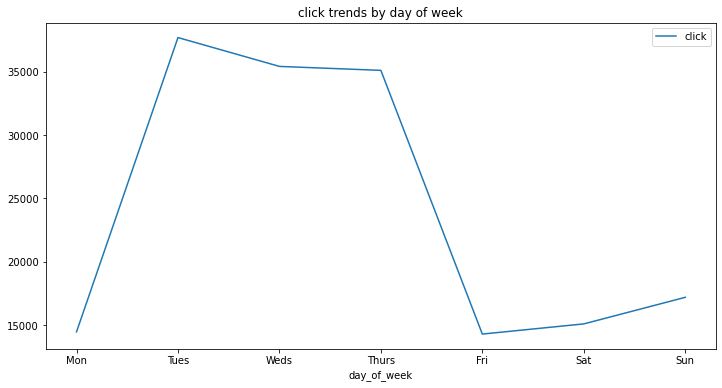

In [22]:
train['day_of_week'] = train['hour'].apply(lambda val: val.strftime("%A"))
cats = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
train.groupby('day_of_week').agg({'click':'sum'}).reindex(cats).plot(figsize=(12,6))
ticks = list(range(0, 7, 1)) # points on the x axis where you want the label to appear
labels = "Mon Tues Weds Thurs Fri Sat Sun".split()
plt.xticks(ticks, labels)
plt.title('click trends by day of week');

In [23]:
test['day_of_week'] = test['hour'].apply(lambda val: val.strftime("%A"))

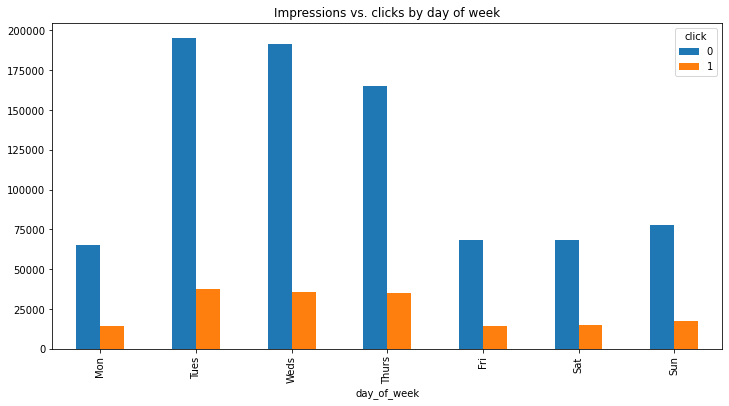

In [24]:
train.groupby(['day_of_week','click']).size().unstack().reindex(cats).plot(kind='bar', title="Day of the Week", figsize=(12,6))
ticks = list(range(0, 7, 1)) # points on the x axis where you want the label to appear
labels = "Mon Tues Weds Thurs Fri Sat Sun".split()
plt.xticks(ticks, labels)
plt.title('Impressions vs. clicks by day of week');

Tuesdays have the most impressions and clicks, then Wednesdays, followed by Thursdays. Mondays and Fridays have the least number of impressions and clicks.

#### Day of week CTR

In [25]:
train.head(3)

,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,...,C14,C15,C16,C17,C18,C19,C20,C21,hour_of_day,day_of_week
0,10000371904215119486,0,2014-10-21,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,15704,320,50,1722,0,35,100084,79,0,Tuesday
1,10005334911727438633,0,2014-10-21,1010,1,85f751fd,c4e18dd6,50e219e0,ffc6ffd0,7801e8d9,...,21665,320,50,2493,3,35,-1,117,0,Tuesday
2,10018283997673108970,0,2014-10-21,1002,0,75f43c5a,c4e18dd6,50e219e0,ecad2386,7801e8d9,...,21665,320,50,2493,3,35,-1,117,0,Tuesday


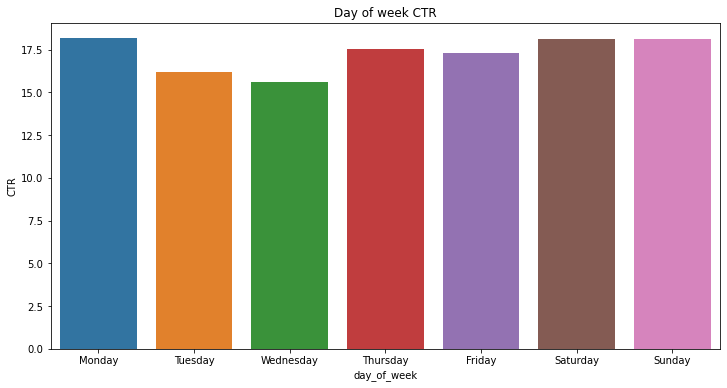

In [26]:
df_click = train[train['click'] == 1]
df_dayofweek = train[['day_of_week','click']].groupby(['day_of_week']).count().reset_index()
df_dayofweek = df_dayofweek.rename(columns={'click': 'impressions'})
df_dayofweek['clicks'] = df_click[['day_of_week','click']].groupby(['day_of_week']).count().reset_index()['click']
df_dayofweek['CTR'] = df_dayofweek['clicks']/df_dayofweek['impressions']*100

plt.figure(figsize=(12,6))
sns.barplot(y='CTR', x='day_of_week', data=df_dayofweek, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Day of week CTR');

While Tuesdays and Wednesdays have the highest number of impressions and clicks, their CTR are among the lowest. Saturdays and Sundays enjoy the highest CTR. Apparently, people have more time to click over the weekend.

In [27]:
train.head(3)

,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,...,C14,C15,C16,C17,C18,C19,C20,C21,hour_of_day,day_of_week
0,10000371904215119486,0,2014-10-21,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,15704,320,50,1722,0,35,100084,79,0,Tuesday
1,10005334911727438633,0,2014-10-21,1010,1,85f751fd,c4e18dd6,50e219e0,ffc6ffd0,7801e8d9,...,21665,320,50,2493,3,35,-1,117,0,Tuesday
2,10018283997673108970,0,2014-10-21,1002,0,75f43c5a,c4e18dd6,50e219e0,ecad2386,7801e8d9,...,21665,320,50,2493,3,35,-1,117,0,Tuesday


### C1 feature

C1 is one of the anonymized categorical features. Although we don't know its meaning, we still want to have a look its distribution.

In [28]:
print(train.C1.value_counts()/len(train))

1005    0.919179
1002    0.054629
1010    0.022163
1012    0.002743
1007    0.000894
1001    0.000245
1008    0.000147
Name: C1, dtype: float64


C1 value = 1005 has the most data, almost 92%. Let's see whether we can find value of C1 indicates something about CTR.

In [29]:
C1_values = train.C1.unique()
C1_values.sort()
ctr_avg_list=[]
for i in C1_values:
    ctr_avg=train.loc[np.where((train.C1 == i))].click.mean()
    ctr_avg_list.append(ctr_avg)
    print("for C1 value: {},  click through rate: {}".format(i,ctr_avg))

for C1 value: 1001,  click through rate: 0.0163265306122449
for C1 value: 1002,  click through rate: 0.20862545534423108
for C1 value: 1005,  click through rate: 0.16895620983508108
for C1 value: 1007,  click through rate: 0.03691275167785235
for C1 value: 1008,  click through rate: 0.10884353741496598
for C1 value: 1010,  click through rate: 0.09362450931733068
for C1 value: 1012,  click through rate: 0.17098067808968284


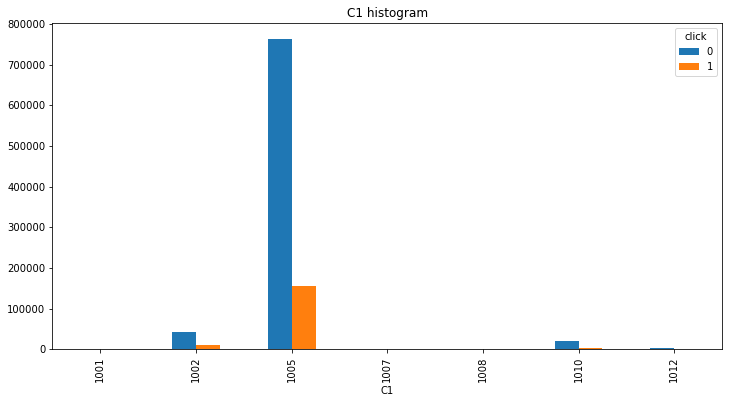

In [30]:
train.groupby(['C1', 'click']).size().unstack().plot(kind='bar', figsize=(12,6), title='C1 histogram');

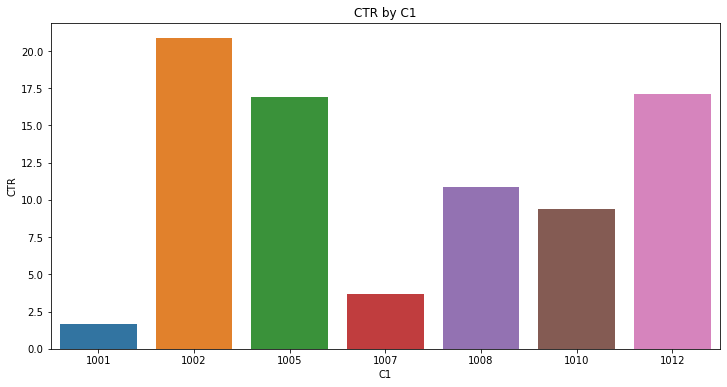

In [31]:
df_c1 = train[['C1','click']].groupby(['C1']).count().reset_index()
df_c1 = df_c1.rename(columns={'click': 'impressions'})
df_c1['clicks'] = df_click[['C1','click']].groupby(['C1']).count().reset_index()['click']
df_c1['CTR'] = df_c1['clicks']/df_c1['impressions']*100

plt.figure(figsize=(12,6))
sns.barplot(y='CTR', x='C1', data=df_c1)
plt.title('CTR by C1');

The average CTR in the data is 0.17.

In [32]:
train['click'].mean()

0.169295

In [33]:
df_c1.CTR.describe()

count     7.000000
mean     11.489567
std       7.204124
min       1.632653
25%       6.526863
50%      10.884354
75%      16.996844
max      20.862546
Name: CTR, dtype: float64

The important C1 values and CTR pairs are:

1005: 92% of the data and 0.17 CTR

1002: 5.5% of the data and 0.21 CTR

1010: 2.3% of the data and 0.096 CTR

1002 has a much higher than average CTR, and 1010 has a much lower than average CTR, it seems these two C1 values are important for predicting CTR.

### Banner position

I have heard that there are many factors that affect the performance of your banner ads, but the most influential one is the banner position. Let's see whether it is true.

In [34]:
print(train.banner_pos.value_counts()/len(train))

0    0.720460
1    0.277838
7    0.001024
2    0.000312
4    0.000162
5    0.000147
3    0.000057
Name: banner_pos, dtype: float64


In [35]:
banner_pos = train.banner_pos.unique()
banner_pos.sort()
ctr_avg_list=[]
for i in banner_pos:
    ctr_avg=train.loc[np.where((train.banner_pos == i))].click.mean()
    ctr_avg_list.append(ctr_avg)
    print("for banner position: {},  click through rate: {}".format(i,ctr_avg))

for banner position: 0,  click through rate: 0.16371207284235073
for banner position: 1,  click through rate: 0.18330825876949877
for banner position: 2,  click through rate: 0.15705128205128205
for banner position: 3,  click through rate: 0.15789473684210525
for banner position: 4,  click through rate: 0.1728395061728395
for banner position: 5,  click through rate: 0.10884353741496598
for banner position: 7,  click through rate: 0.3076171875


The important banner positions are:

position 0: 72% of the data and 0.16 CTR

position 1: 28% of the data and 0.18 CTR

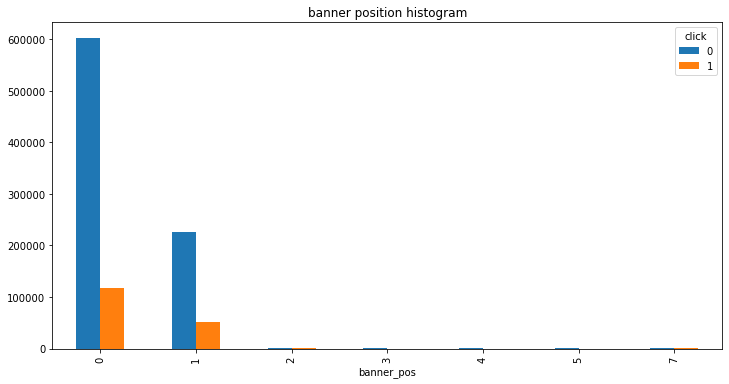

In [36]:
train.groupby(['banner_pos', 'click']).size().unstack().plot(kind='bar', figsize=(12,6), title='banner position histogram');

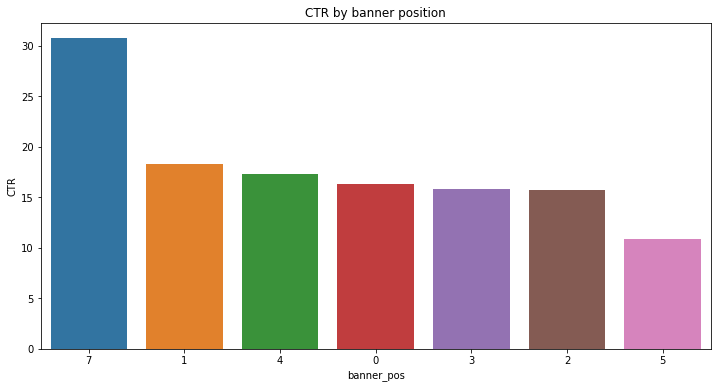

In [37]:
df_banner = train[['banner_pos','click']].groupby(['banner_pos']).count().reset_index()
df_banner = df_banner.rename(columns={'click': 'impressions'})
df_banner['clicks'] = df_click[['banner_pos','click']].groupby(['banner_pos']).count().reset_index()['click']
df_banner['CTR'] = df_banner['clicks']/df_banner['impressions']*100
sort_banners = df_banner.sort_values(by='CTR',ascending=False)['banner_pos'].tolist()
plt.figure(figsize=(12,6))
sns.barplot(y='CTR', x='banner_pos', data=df_banner, order=sort_banners)
plt.title('CTR by banner position');

In [38]:
df_banner.CTR.describe()

count     7.000000
mean     17.875237
std       6.148346
min      10.884354
25%      15.747301
50%      16.371207
75%      17.807388
max      30.761719
Name: CTR, dtype: float64

Although banner position 0 and 1 have the highest number of impressions and clicks, banner 7 enjoys the highest click through rate. Increasing the number of ads placed on banner position 7 seems to be a good idea.

### Site features

#### site id

In [39]:
print("There are {} sites in the data set".format(train.site_id.nunique()))

There are 2629 sites in the data set


In [40]:
print('The top 10 site ids that have the most impressions')
print((train.site_id.value_counts()/len(train))[0:10])

The top 10 site ids that have the most impressions
85f751fd    0.361055
1fbe01fe    0.160367
e151e245    0.065123
d9750ee7    0.023510
5b08c53b    0.022723
5b4d2eda    0.019023
856e6d3f    0.018960
a7853007    0.011337
b7e9786d    0.009100
5ee41ff2    0.008842
Name: site_id, dtype: float64


In [41]:
top10_ids = (train.site_id.value_counts()/len(train))[0:10].index
click_avg_list=[]

for i in top10_ids:
    click_avg=train.loc[np.where((train.site_id == i))].click.mean()
    click_avg_list.append(click_avg)
    print("for site id value: {},  click through rate: {}".format(i,click_avg))

for site id value: 85f751fd,  click through rate: 0.11829222694603315
for site id value: 1fbe01fe,  click through rate: 0.2055410402389519
for site id value: e151e245,  click through rate: 0.2978978241174393
for site id value: d9750ee7,  click through rate: 0.2858358145470013
for site id value: 5b08c53b,  click through rate: 0.4691722043744224
for site id value: 5b4d2eda,  click through rate: 0.13010566156757608
for site id value: 856e6d3f,  click through rate: 0.04208860759493671
for site id value: a7853007,  click through rate: 0.10478962688541943
for site id value: b7e9786d,  click through rate: 0.0745054945054945
for site id value: 5ee41ff2,  click through rate: 0.31893236824247906


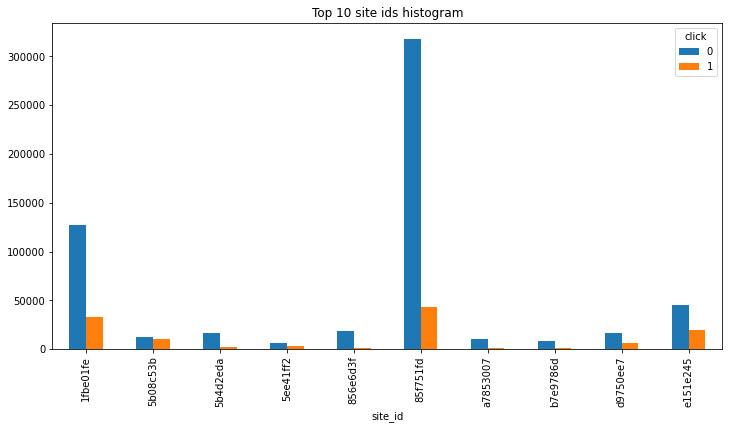

In [42]:
top10_sites = train[(train.site_id.isin((train.site_id.value_counts()/len(train))[0:10].index))]
top10_sites_click = top10_sites[top10_sites['click'] == 1]
top10_sites.groupby(['site_id', 'click']).size().unstack().plot(kind='bar', figsize=(12,6), title='Top 10 site ids histogram');

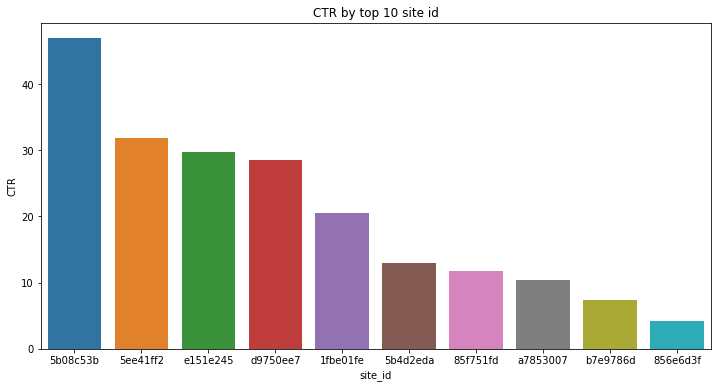

In [43]:
df_site = top10_sites[['site_id','click']].groupby(['site_id']).count().reset_index()
df_site = df_site.rename(columns={'click': 'impressions'})
df_site['clicks'] = top10_sites_click[['site_id','click']].groupby(['site_id']).count().reset_index()['click']
df_site['CTR'] = df_site['clicks']/df_site['impressions']*100
sort_site = df_site.sort_values(by='CTR',ascending=False)['site_id'].tolist()
plt.figure(figsize=(12,6))
sns.barplot(y='CTR', x='site_id', data=df_site, order=sort_site)
plt.title('CTR by top 10 site id');

The site_id feature seems important because the CTR for the top 10 sites, some as high as 0.47, and some as low as 0.04, and they are significantly different from overall CTR 0.16.

#### site domain 

In [44]:
print("There are {} site domains in the data set".format(train.site_domain.nunique()))

There are 2870 site domains in the data set


In [45]:
print('The top 10 site domains that have the most impressions')
print((train.site_domain.value_counts()/len(train))[0:10])

The top 10 site domains that have the most impressions
c4e18dd6    0.374269
f3845767    0.160367
7e091613    0.082005
7687a86e    0.032086
98572c79    0.024329
16a36ef3    0.021038
58a89a43    0.018960
9d54950b    0.009456
b12b9f85    0.009212
17d996e6    0.008960
Name: site_domain, dtype: float64


In [46]:
top10_domains = (train.site_domain.value_counts()/len(train))[0:10].index
click_avg_list=[]

for i in top10_domains:
    click_avg=train.loc[np.where((train.site_domain == i))].click.mean()
    click_avg_list.append(click_avg)
    print("for site domain value: {},  click through rate: {}".format(i,click_avg))

for site domain value: c4e18dd6,  click through rate: 0.12195239253050613
for site domain value: f3845767,  click through rate: 0.2055410402389519
for site domain value: 7e091613,  click through rate: 0.26011828547039817
for site domain value: 7687a86e,  click through rate: 0.4593280558499034
for site domain value: 98572c79,  click through rate: 0.27995396440462
for site domain value: 16a36ef3,  click through rate: 0.14136324745698262
for site domain value: 58a89a43,  click through rate: 0.04208860759493671
for site domain value: 9d54950b,  click through rate: 0.10638747884940779
for site domain value: b12b9f85,  click through rate: 0.07511940946591403
for site domain value: 17d996e6,  click through rate: 0.31651785714285713


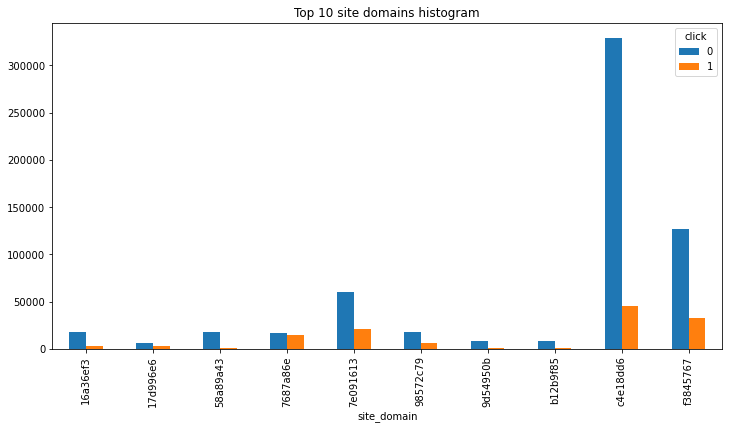

In [47]:
top10_domain = train[(train.site_domain.isin((train.site_domain.value_counts()/len(train))[0:10].index))]
top10_domain_click = top10_domain[top10_domain['click'] == 1]
top10_domain.groupby(['site_domain', 'click']).size().unstack().plot(kind='bar', figsize=(12,6), title='Top 10 site domains histogram');

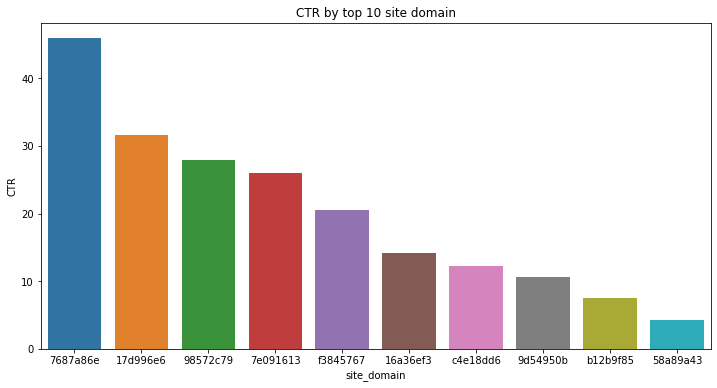

In [48]:
df_domain = top10_domain[['site_domain','click']].groupby(['site_domain']).count().reset_index()
df_domain = df_domain.rename(columns={'click': 'impressions'})
df_domain['clicks'] = top10_domain_click[['site_domain','click']].groupby(['site_domain']).count().reset_index()['click']
df_domain['CTR'] = df_domain['clicks']/df_domain['impressions']*100
sort_domain = df_domain.sort_values(by='CTR',ascending=False)['site_domain'].tolist()
plt.figure(figsize=(12,6))
sns.barplot(y='CTR', x='site_domain', data=df_domain, order=sort_domain)
plt.title('CTR by top 10 site domain');

Similar with the site_id feature, the site_domain feature seems important as well.

#### site category

In [49]:
print("There are {} site categories in the data set".format(train.site_category.nunique()))

There are 22 site categories in the data set


In [50]:
print('The top 10 site categories that have the most impressions')
print((train.site_category.value_counts()/len(train))[0:10])

The top 10 site categories that have the most impressions
50e219e0    0.408853
f028772b    0.312812
28905ebd    0.182521
3e814130    0.076092
f66779e6    0.006207
75fa27f6    0.003902
335d28a8    0.003328
76b2941d    0.002587
c0dd3be3    0.001051
72722551    0.000659
Name: site_category, dtype: float64


In [51]:
top10_categories = (train.site_category.value_counts()/len(train))[0:10].index
click_avg_list=[]

for i in top10_categories:
    click_avg=train.loc[np.where((train.site_category == i))].click.mean()
    click_avg_list.append(click_avg)
    print("for site category value: {},  click through rate: {}".format(i,click_avg))

for site category value: 50e219e0,  click through rate: 0.12777697607697633
for site category value: f028772b,  click through rate: 0.17920987685894402
for site category value: 28905ebd,  click through rate: 0.20743914398891086
for site category value: 3e814130,  click through rate: 0.28213215581138623
for site category value: f66779e6,  click through rate: 0.03979378121475753
for site category value: 75fa27f6,  click through rate: 0.11173757047667862
for site category value: 335d28a8,  click through rate: 0.09615384615384616
for site category value: 76b2941d,  click through rate: 0.032856590645535366
for site category value: c0dd3be3,  click through rate: 0.0922930542340628
for site category value: 72722551,  click through rate: 0.06676783004552352


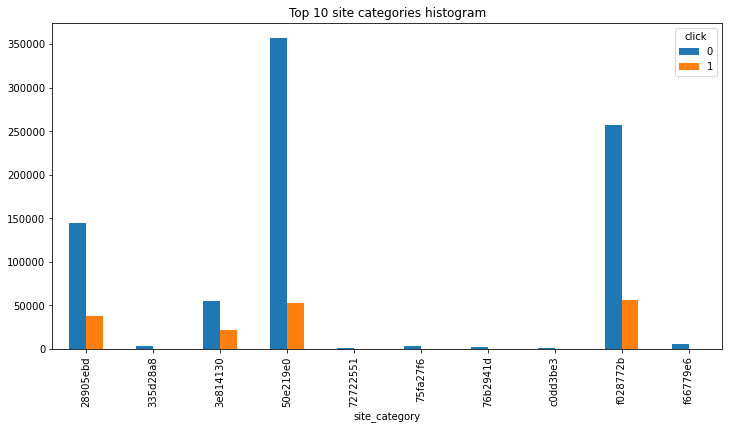

In [52]:
top10_category = train[(train.site_category.isin((train.site_category.value_counts()/len(train))[0:10].index))]
top10_category_click = top10_category[top10_category['click'] == 1]
top10_category.groupby(['site_category', 'click']).size().unstack().plot(kind='bar', figsize=(12,6), title='Top 10 site categories histogram');

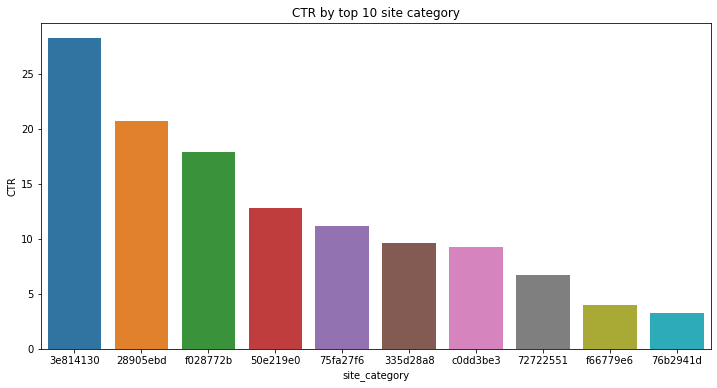

In [53]:
df_category = top10_category[['site_category','click']].groupby(['site_category']).count().reset_index()
df_category = df_category.rename(columns={'click': 'impressions'})
df_category['clicks'] = top10_category_click[['site_category','click']].groupby(['site_category']).count().reset_index()['click']
df_category['CTR'] = df_category['clicks']/df_category['impressions']*100
sort_category = df_category.sort_values(by='CTR',ascending=False)['site_category'].tolist()
plt.figure(figsize=(12,6))
sns.barplot(y='CTR', x='site_category', data=df_category, order=sort_category)
plt.title('CTR by top 10 site category');

### Device features

#### device id

In [54]:
print("There are {} devices in the data set".format(train.device_id.nunique()))

There are 149973 devices in the data set


In [55]:
print('The top 10 devices that have the most impressions')
print((train.device_id.value_counts()/len(train))[0:10])

The top 10 devices that have the most impressions
a99f214a    0.825529
0f7c61dc    0.000502
c357dbff    0.000482
936e92fb    0.000335
afeffc18    0.000257
987552d1    0.000101
28dc8687    0.000100
cef4c8cc    0.000100
d857ffbb    0.000097
b09da1c4    0.000086
Name: device_id, dtype: float64


In [56]:
top10_devices = (train.device_id.value_counts()/len(train))[0:10].index
click_avg_list=[]

for i in top10_devices:
    click_avg=train.loc[np.where((train.device_id == i))].click.mean()
    click_avg_list.append(click_avg)
    print("for device id value: {},  click through rate: {}".format(i,click_avg))

for device id value: a99f214a,  click through rate: 0.17365713378936415
for device id value: 0f7c61dc,  click through rate: 0.7171314741035857
for device id value: c357dbff,  click through rate: 0.6473029045643154
for device id value: 936e92fb,  click through rate: 0.04776119402985075
for device id value: afeffc18,  click through rate: 0.2607003891050584
for device id value: 987552d1,  click through rate: 0.0
for device id value: 28dc8687,  click through rate: 0.0
for device id value: cef4c8cc,  click through rate: 0.21
for device id value: d857ffbb,  click through rate: 0.18556701030927836
for device id value: b09da1c4,  click through rate: 0.1511627906976744


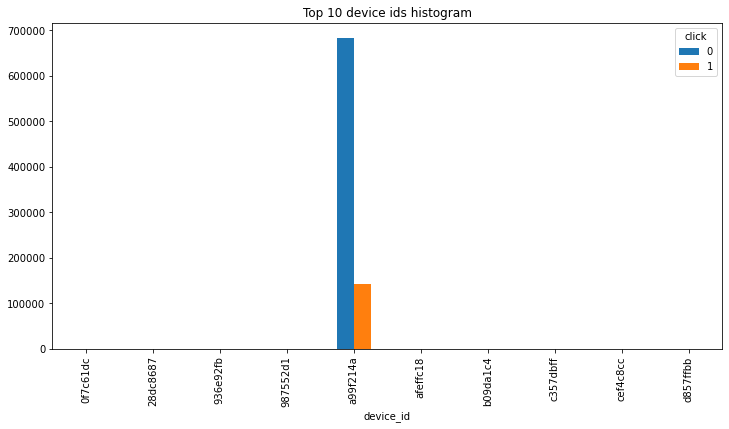

In [57]:
top10_device = train[(train.device_id.isin((train.device_id.value_counts()/len(train))[0:10].index))]
top10_device_click = top10_device[top10_device['click'] == 1]
top10_device.groupby(['device_id', 'click']).size().unstack().plot(kind='bar', figsize=(12,6), title='Top 10 device ids histogram');

You will see that most of device_id is a99f214a : Approx. 83% of the data, and the second major device_id is only 0.05% of the data. And there are some extremely high CTR here with device id at 0f7c61dc.

#### device ip

Device ip is more of a users ip address, so, there are a lot of them.

In [58]:
print("There are {} device ips in the data set".format(train.device_ip.nunique()))
print("There are {} device types in the data set".format(train.device_type.nunique()))
print("There are {} device models in the data set".format(train.device_model.nunique()))
print("There are {} device cnn types in the data set".format(train.device_conn_type.nunique()))

There are 555194 device ips in the data set
There are 4 device types in the data set
There are 5164 device models in the data set
There are 4 device cnn types in the data set


#### device type

In [59]:
print('The impressions by device types')
print((train.device_type.value_counts()/len(train)))

The impressions by device types
1    0.923208
0    0.054629
4    0.018986
5    0.003177
Name: device_type, dtype: float64


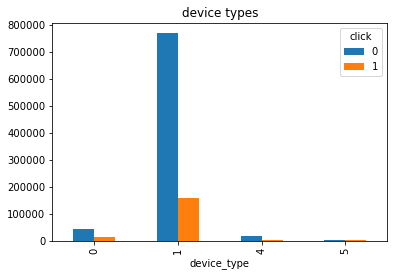

In [60]:
train[['device_type','click']].groupby(['device_type','click']).size().unstack().plot(kind='bar', title='device types');

Device type 1 gets the most impressions and clicks. And the other device types only get the minimum impressions and clicks. We may want to look in more details about device type 1. 

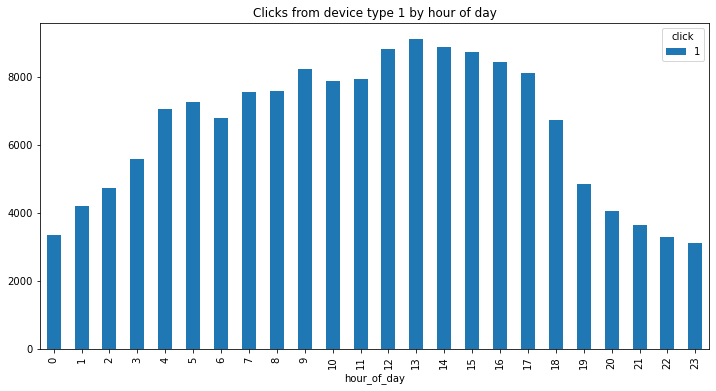

In [61]:
df_click[df_click['device_type']==1].groupby(['hour_of_day', 'click']).size().unstack().plot(kind='bar', title="Clicks from device type 1 by hour of day", figsize=(12,6));

As expected, most clicks happened during the business hours from device type 1. device type is definitely an important feature. 

In [62]:
device_type_click = df_click.groupby('device_type').agg({'click':'sum'}).reset_index()
device_type_impression = train.groupby('device_type').agg({'click':'count'}).reset_index().rename(columns={'click': 'impressions'})
merged_device_type = pd.merge(left = device_type_click , right = device_type_impression, how = 'inner', on = 'device_type')

In [63]:
merged_device_type['CTR'] = merged_device_type['click'] / merged_device_type['impressions']*100

In [64]:
merged_device_type

,device_type,click,impressions,CTR
0,0,11397,54629,20.862546
1,1,155823,923208,16.878428
2,4,1784,18986,9.396397
3,5,291,3177,9.159585


The highest CTR comes from device type 0.

#### app features

In [65]:
print("There are {} apps in the data set".format(train.app_id.nunique()))
print("There are {} app domains in the data set".format(train.app_domain.nunique()))
print("There are {} app categories in the data set".format(train.app_category.nunique()))

There are 3150 apps in the data set
There are 194 app domains in the data set
There are 26 app categories in the data set


Looks like app category something worth to explore.

In [66]:
print('The impressions by app categories')
print((train.app_category.value_counts()/len(train)))

The impressions by app categories
07d7df22    0.647094
0f2161f8    0.236657
cef3e649    0.042900
8ded1f7a    0.036355
f95efa07    0.028002
d1327cf5    0.003047
dc97ec06    0.001342
09481d60    0.001319
75d80bbe    0.001034
fc6fa53d    0.000601
4ce2e9fc    0.000523
a3c42688    0.000297
879c24eb    0.000282
4681bb9d    0.000165
0f9a328c    0.000149
a86a3e89    0.000071
2281a340    0.000063
8df2e842    0.000044
79f0b860    0.000017
a7fd01ec    0.000009
18b1e0be    0.000009
7113d72a    0.000007
2fc4f2aa    0.000006
0bfbc358    0.000005
86c1a5a3    0.000001
bf8ac856    0.000001
Name: app_category, dtype: float64


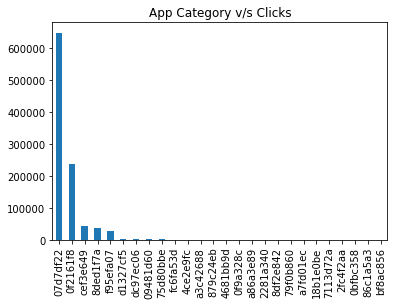

In [67]:
train['app_category'].value_counts().plot(kind='bar', title='App Category v/s Clicks')

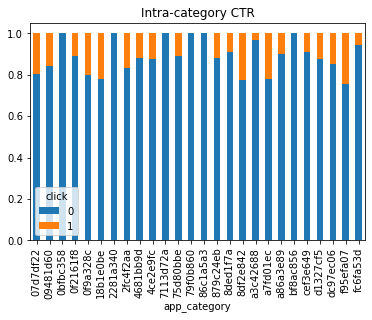

In [68]:
train_app_category = train.groupby(['app_category', 'click']).size().unstack()
train_app_category.div(train_app_category.sum(axis=1), axis=0).plot(kind='bar', stacked=True, title="Intra-category CTR");

#### C14 - C21 features

In [69]:
print("There are {} C14 in the data set".format(train.C14.nunique()))
print("There are {} C15 in the data set".format(train.C15.nunique()))
print("There are {} C16 in the data set".format(train.C16.nunique()))
print("There are {} C17 in the data set".format(train.C17.nunique()))
print("There are {} C18 in the data set".format(train.C18.nunique()))
print("There are {} C19 in the data set".format(train.C19.nunique()))
print("There are {} C20 in the data set".format(train.C20.nunique()))

There are 2257 C14 in the data set
There are 8 C15 in the data set
There are 9 C16 in the data set
There are 421 C17 in the data set
There are 4 C18 in the data set
There are 66 C19 in the data set
There are 164 C20 in the data set


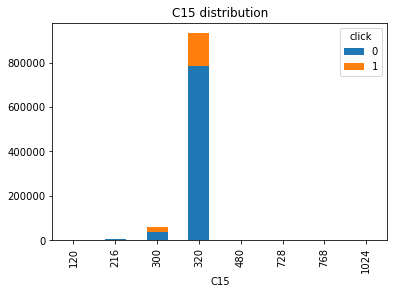

In [70]:
train.groupby(['C15', 'click']).size().unstack().plot(kind='bar', stacked=True, title='C15 distribution');

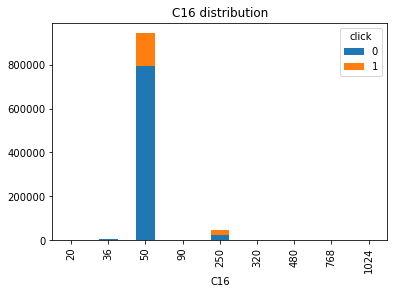

In [71]:
train.groupby(['C16', 'click']).size().unstack().plot(kind='bar', stacked=True, title='C16 distribution');

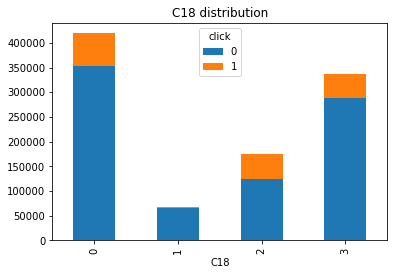

In [72]:
train.groupby(['C18', 'click']).size().unstack().plot(kind='bar', stacked=True, title='C18 distribution');

In [73]:
train.head(3)

,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,...,C14,C15,C16,C17,C18,C19,C20,C21,hour_of_day,day_of_week
0,10000371904215119486,0,2014-10-21,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,15704,320,50,1722,0,35,100084,79,0,Tuesday
1,10005334911727438633,0,2014-10-21,1010,1,85f751fd,c4e18dd6,50e219e0,ffc6ffd0,7801e8d9,...,21665,320,50,2493,3,35,-1,117,0,Tuesday
2,10018283997673108970,0,2014-10-21,1002,0,75f43c5a,c4e18dd6,50e219e0,ecad2386,7801e8d9,...,21665,320,50,2493,3,35,-1,117,0,Tuesday


In [74]:
def convert_obj_to_int(self):
    
    object_list_columns = self.columns
    object_list_dtypes = self.dtypes
    new_col_suffix = '_int'
    for index in range(0,len(object_list_columns)):
        if object_list_dtypes[index] == object :
            self[object_list_columns[index]+new_col_suffix] = self[object_list_columns[index]].map( lambda  x: hash(x))
            self.drop([object_list_columns[index]],inplace=True,axis=1)
    return self
train = convert_obj_to_int(train)

In [75]:
test=convert_obj_to_int(test)

In [76]:
train.head(3)

,id,click,hour,C1,banner_pos,device_type,device_conn_type,C14,C15,C16,...,site_id_int,site_domain_int,site_category_int,app_id_int,app_domain_int,app_category_int,device_id_int,device_ip_int,device_model_int,day_of_week_int
0,10000371904215119486,0,2014-10-21,1005,0,1,0,15704,320,50,...,6573678077052653579,-5366300502697991171,864823366219062554,4783731206237697471,-8512906225409388542,6922234500712782662,6294556526574933194,-3031503058173903380,6031632229478728305,-7032259346425029848
1,10005334911727438633,0,2014-10-21,1010,1,4,0,21665,320,50,...,2362145463585156537,-3768907907022545077,-8832487363440701630,810373345596767033,-8512906225409388542,-8261289060919990666,-6817893076965448887,-1794769522316100073,443208518043421105,-7032259346425029848
2,10018283997673108970,0,2014-10-21,1002,0,0,0,21665,320,50,...,-1144697358625376339,-3768907907022545077,-8832487363440701630,4783731206237697471,-8512906225409388542,6922234500712782662,5819594717964669202,2531113938756708850,-3879721948086980952,-7032259346425029848


In [77]:
train.drop('hour', axis=1, inplace=True)

In [78]:
test.drop('hour', axis=1, inplace=True)

In [79]:
train.drop('id', axis=1, inplace=True)

In [80]:
test.drop('id', axis=1, inplace=True)

In [81]:
import lightgbm as lgb
X_train = train.loc[:, train.columns != 'click']
y_target = train.click.values
#create lightgbm dataset
msk = np.random.rand(len(X_train)) < 0.8
lgb_train = lgb.Dataset(X_train[msk], y_target[msk])
lgb_eval = lgb.Dataset(X_train[~msk], y_target[~msk], reference=lgb_train)

In [82]:
len(X_train.columns)

23

In [83]:
# specify your configurations as a dict
params = {
    'task': 'train',
    'boosting_type': 'gbdt',
    'objective': 'binary',
    'metric': { 'binary_logloss'},
    'num_leaves': 31, # defauly leaves(31) amount for each tree
    'learning_rate': 0.08,
    'feature_fraction': 0.7, # will select 70% features before training each tree
    'bagging_fraction': 0.3, #feature_fraction, but this will random select part of data
    'bagging_freq': 5, #  perform bagging at every 5 iteration
    'verbose': 0
}

print('Start training...')
# train
gbm = lgb.train(params,
                lgb_train,
                num_boost_round=4000,
                valid_sets=lgb_eval,
                early_stopping_rounds=500)

Start training...
[1]	valid_0's binary_logloss: 0.44778
Training until validation scores don't improve for 500 rounds
[2]	valid_0's binary_logloss: 0.443586
[3]	valid_0's binary_logloss: 0.439946
[4]	valid_0's binary_logloss: 0.436672
[5]	valid_0's binary_logloss: 0.434003
[6]	valid_0's binary_logloss: 0.431719
[7]	valid_0's binary_logloss: 0.429619
[8]	valid_0's binary_logloss: 0.42785
[9]	valid_0's binary_logloss: 0.426216
[10]	valid_0's binary_logloss: 0.424709
[11]	valid_0's binary_logloss: 0.423357
[12]	valid_0's binary_logloss: 0.422236
[13]	valid_0's binary_logloss: 0.421163
[14]	valid_0's binary_logloss: 0.419988
[15]	valid_0's binary_logloss: 0.418997
[16]	valid_0's binary_logloss: 0.41821
[17]	valid_0's binary_logloss: 0.417477
[18]	valid_0's binary_logloss: 0.416822
[19]	valid_0's binary_logloss: 0.416201
[20]	valid_0's binary_logloss: 0.415668
[21]	valid_0's binary_logloss: 0.415118
[22]	valid_0's binary_logloss: 0.41461
[23]	valid_0's binary_logloss: 0.414201
[24]	valid_0'

In [84]:
print(gbm.best_score)
print(gbm.best_iteration)

defaultdict(<class 'collections.OrderedDict'>, {'valid_0': OrderedDict([('binary_logloss', 0.3983591182556369)])})
1029


In [85]:
len(test.columns)

23

In [86]:
ans1=gbm.predict(test)

In [87]:
ans1

array([0.2194082 , 0.26328199, 0.13699277, ..., 0.08753133, 0.13220696,
       0.05777401])

In [88]:
from operator import itemgetter
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import roc_auc_score

def run_default_test(train, test, features, target, random_state=0):
    eta = 0.1
    max_depth = 5
    subsample = 0.8
    colsample_bytree = 0.8
    print('XGBoost params. ETA: {}, MAX_DEPTH: {}, SUBSAMPLE: {}, COLSAMPLE_BY_TREE: {}'.format(eta, max_depth, subsample, colsample_bytree))
    params = {
        "objective": "binary:logistic",
        "booster" : "gbtree",
        "eval_metric": "logloss",
        "eta": eta,
        "max_depth": max_depth,
        "subsample": subsample,
        "colsample_bytree": colsample_bytree,
        "silent": 1,
        "seed": random_state
    }
    num_boost_round = 260
    early_stopping_rounds = 20
    test_size = 0.2

    X_train, X_valid = train_test_split(train, test_size=test_size, random_state=random_state)
    y_train = X_train[target]
    y_valid = X_valid[target]
    dtrain = xgb.DMatrix(X_train[features], y_train)
    dvalid = xgb.DMatrix(X_valid[features], y_valid)
    watchlist = [(dtrain, 'train'), (dvalid, 'eval')]
    gbm = xgb.train(params, dtrain, num_boost_round, evals=watchlist, early_stopping_rounds=early_stopping_rounds, verbose_eval=True)

In [89]:
features = ['C1', 'banner_pos', 'device_type', 'device_conn_type', 'C14',
       'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21', 'hour_of_day',
       'site_id_int', 'site_domain_int', 'site_category_int', 'app_id_int',
       'app_domain_int', 'app_category_int', 'device_id_int', 'device_ip_int',
       'device_model_int', 'day_of_week_int']
run_default_test(train, y_target, features, 'click')

XGBoost params. ETA: 0.1, MAX_DEPTH: 5, SUBSAMPLE: 0.8, COLSAMPLE_BY_TREE: 0.8
[0]	train-logloss:0.64852	eval-logloss:0.648788
Multiple eval metrics have been passed: 'eval-logloss' will be used for early stopping.

Will train until eval-logloss hasn't improved in 20 rounds.
[1]	train-logloss:0.611969	eval-logloss:0.612103
[2]	train-logloss:0.581808	eval-logloss:0.581912
[3]	train-logloss:0.556822	eval-logloss:0.556841
[4]	train-logloss:0.535853	eval-logloss:0.535857
[5]	train-logloss:0.518281	eval-logloss:0.518193
[6]	train-logloss:0.503235	eval-logloss:0.503474
[7]	train-logloss:0.490713	eval-logloss:0.490897
[8]	train-logloss:0.480166	eval-logloss:0.480231
[9]	train-logloss:0.470979	eval-logloss:0.471307
[10]	train-logloss:0.463422	eval-logloss:0.463717
[11]	train-logloss:0.45693	eval-logloss:0.457271
[12]	train-logloss:0.451284	eval-logloss:0.451602
[13]	train-logloss:0.446568	eval-logloss:0.446852
[14]	train-logloss:0.442458	eval-logloss:0.442818
[15]	train-logloss:0.438958	eval-l

In [90]:
ans2=gbm.predict(test)

In [91]:
test_copy['click']=ans2

In [92]:
pd.DataFrame(test_copy, columns=['id','click']).to_csv('XGB_tweak.csv',mode = 'w', index=False)